In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def prepare_data(funcs, noise):
    data = []
    for func in funcs:
        t = np.random.randn(100)
        x = np.stack([f(t) for f in func])
        x += np.random.randn(len(func), 100) * noise
        data.append(x)
    return np.concatenate(data, axis = 1)

In [3]:
def plot_PCA(funcs, colors, noise):
    X = prepare_data(funcs, noise)
    print(X.shape)

    print(np.linalg.eig(np.matmul(X, X.T)))
    
    # Standardise the data
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X.T)
    print(scaler)

    print(np.linalg.eig(np.matmul(X_std.T, X_std)))
    
    # Apply PCA with 2 components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)
    print(pca)
    print(pca.transform(scaler.transform([[-3.3, -1.8, -1.8]])))
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    print("Explained variance: {}, sum: {}".format(explained_variance, sum(explained_variance)))
    
    # Visualisation
    all_colors = []
    for color in colors:
        all_colors += [color] * 100
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c = all_colors)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA")
    plt.show()

(3, 300)
(array([3298.1631032 , 1399.59253786,   77.31441638]), array([[ 0.55669568, -0.83070691, -0.00399352],
       [-0.5805873 , -0.38563151, -0.71708209],
       [-0.59414502, -0.40151509,  0.69697728]]))
StandardScaler()
(array([622.51702109, 258.45924579,  19.02373311]), array([[ 0.33782363, -0.94119331, -0.00550944],
       [-0.6660961 , -0.23493885, -0.70789811],
       [-0.66497458, -0.24281452,  0.70629308]]))
PCA(n_components=2)
[[-1.36388743  1.51776474]]
Explained variance: [0.69168558 0.28717694], sum: 0.9788625187637625


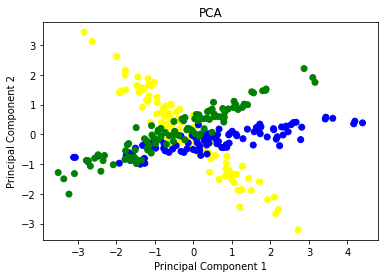

In [4]:
plot_PCA([
        [
            lambda x: 2 * x - 1.3,
            lambda x: 2 * x + 0.2,
            lambda x: 2 * x + 0.2,    # same
        ],
        [
            lambda x: 2 * x - 0.5,
            lambda x: -2 * x + 1.1,
            lambda x: -2 * x + 1.1,   # same
        ],
        [
            lambda x: 3 * x - 1.5,
            lambda x: -1.5 * x + 0.5,
            lambda x: -1.5 * x + 0.5, # same
        ]
    ],
    ['yellow', 'blue', 'green'],
    0.5,
)

(3, 300)
(array([6258.24265592, 2035.32126926,  676.54403275]), array([[-0.18295226, -0.92740553,  0.32626287],
       [ 0.26929211, -0.36644496, -0.89061768],
       [-0.94552114,  0.0750805 , -0.31678492]]))
StandardScaler()
(array([122.32908313, 312.6174803 , 465.05343656]), array([[ 0.44381199, -0.79995212, -0.40386572],
       [-0.69382019, -0.02151674, -0.71982676],
       [-0.56713707, -0.59967795,  0.56457232]]))
PCA(n_components=2)
[[1.35699035 0.71045891]]
Explained variance: [0.51672604 0.34735276], sum: 0.8640787965187713


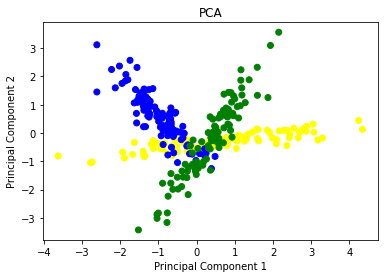

In [8]:
plot_PCA([
        [
            lambda x: 2 * x - 1.3,
            lambda x: 2 * x + 0.2,
            lambda x: -3 * x + 0.2,
        ],
        [
            lambda x: 2 * x - 0.5,
            lambda x: -2 * x + 1.1,
            lambda x: 1.5 * x - 6.1,
        ],
        [
            lambda x: -3 * x - 1.5,
            lambda x: -1.5 * x + 0.5,
            lambda x: -2.7 * x - 0.2,
        ]
    ],
    ['yellow', 'blue', 'green'],
    0.5,
)

(3, 300)
(array([3871.53041835,  410.83370427,    4.04531907]), array([[ 0.09622096, -0.9647408 ,  0.2449831 ],
       [-0.1802496 ,  0.2251672 ,  0.95750186],
       [ 0.97890327,  0.13628985,  0.15222834]]))
StandardScaler()
(array([839.47404563,  53.77168717,   6.7542672 ]), array([[-0.56982811, -0.69725545,  0.43489167],
       [-0.56846988,  0.71662215,  0.40409738],
       [ 0.5934121 ,  0.01695678,  0.80472017]]))
PCA(n_components=2)
[[-6.49621555 -1.06146983]]
Explained variance: [0.93274894 0.05974632], sum: 0.9924952586640271


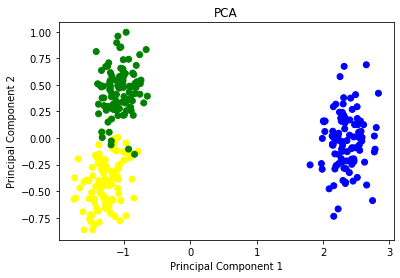

In [6]:
plot_PCA([
        [
            lambda x: 0 * x - 1.3,
            lambda x: 0 * x + 0.2,
            lambda x: 0 * x + 0.2,
        ],
        [
            lambda x: 0 * x - 0.5,
            lambda x: 0 * x + 1.1,
            lambda x: 0 * x - 6.1,
        ],
        [
            lambda x: 0 * x - 1.5,
            lambda x: 0 * x + 0.5,
            lambda x: 0 * x - 0.2,
        ]
    ],
    ['yellow', 'blue', 'green'],
    0.1,
)